In [1]:
#import lib
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass # to hide the password
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Instructions
To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [3]:
# we create and store a connection to the api
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = '823ab773f5e5469690916da4d0b260d4'
                                                            , client_secret = 'd001cd768a31476cba77f47875211ae5'))

### Creating a collection of songs from different artists

In [4]:
# from this list of artist we are going to extract the top 50 sogns in spotify and extract ids and audio features
artists = ["Mango", "Madonna","Mercedes Sosa","Nirvana", "Pavarotti", "Queen", "Metallica"
          ,"Jovanotti", "Zucchero", "Neffa", "Quantic", "Afterhours", "Verdena", "Kyuss",
           "Tame Impala", "Roxette", "Juanes", "Carla Morrison", "Barbara Bonney", "Charly Garcia", "La Portuaria", "Intoxicados",
           "Uncle Acid & The Deadbeats", "Raly Barrionuevo", "Richard Bona", "Greg Howe", "George Benson", "Bill Evans", "Divididos", "Jimi Hendrix", "Ratones Paranoicos", "James Rhodes", "The Doors", "Keith Richards",
           "Elder","Colour Haze",
           "Electric Wizard",
           "Witch",
           "Electric Octopus",
           "All Them Witches",
           "Dead Meadow",
           "OM",
           "Red Fang",
           "Sleep",
           "The Sword",
           "Fu Manchu",
           "Kadavar",
           "Witchcraft",
           "Pentagram",
           "Black Sabbath",
           "Orange Goblin"] 
# loop the artist search
#sp.searc pertutti gli artisti nella lista
my_20_artists = [sp.search(q= artist , limit = 50) for artist in artists]
# create the dictionary
#def artist_to_dict(artists):
   # return{artist:sp.search(q= artist , limit = 50) for artist in artists}
#len(artist_to_dict(artists))

### Taking a look at the information that we have

In [5]:
# get artist name and ids for all the artist
# each item is a dict itself
my_20_artists[3]['tracks'].keys() #each track on spotify is a dictionary witht the following keys

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [6]:
my_20_artists[3]['tracks']['total'] # total reproduction 

48029

In [7]:
# Nirvana, track item number 1
# from here we can find id, uri, etc
my_20_artists[3]['tracks']['items'][0] 

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6olE6TJLqED3rqDCT0FyPh'},
    'href': 'https://api.spotify.com/v1/artists/6olE6TJLqED3rqDCT0FyPh',
    'id': '6olE6TJLqED3rqDCT0FyPh',
    'name': 'Nirvana',
    'type': 'artist',
    'uri': 'spotify:artist:6olE6TJLqED3rqDCT0FyPh'}],
  'available_markets': ['CA', 'MX', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2guirTSEqLizK7j9i1MTTZ'},
  'href': 'https://api.spotify.com/v1/albums/2guirTSEqLizK7j9i1MTTZ',
  'id': '2guirTSEqLizK7j9i1MTTZ',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273e175a19e530c898d167d39bf',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02e175a19e530c898d167d39bf',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d00004851e175a19e530c898d167d39bf',
    'width': 64}],
  'name': 'Nevermind (Remastered)',
  'release_date': '1991

In [8]:
# song title
my_20_artists[3]['tracks']['items'][0]['name']

'Smells Like Teen Spirit'

In [9]:
my_20_artists[3]['tracks']['items'][0]['id']

'5ghIJDpPoe3CfHMGu71E6T'

In [10]:
# my_20_artists[3]['tracks']['items']
my_20_artists[3]['tracks']['items'][0].keys()#['name']

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [11]:
# I found one item and now I need to iterate to get all items for each artist
my_20_artists[3]['tracks']['items']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6olE6TJLqED3rqDCT0FyPh'},
     'href': 'https://api.spotify.com/v1/artists/6olE6TJLqED3rqDCT0FyPh',
     'id': '6olE6TJLqED3rqDCT0FyPh',
     'name': 'Nirvana',
     'type': 'artist',
     'uri': 'spotify:artist:6olE6TJLqED3rqDCT0FyPh'}],
   'available_markets': ['CA', 'MX', 'US'],
   'external_urls': {'spotify': 'https://open.spotify.com/album/2guirTSEqLizK7j9i1MTTZ'},
   'href': 'https://api.spotify.com/v1/albums/2guirTSEqLizK7j9i1MTTZ',
   'id': '2guirTSEqLizK7j9i1MTTZ',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273e175a19e530c898d167d39bf',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e02e175a19e530c898d167d39bf',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d00004851e175a19e530c898d167d39bf',
     'width': 64}],
   'name': 'Nevermind (Remastered)',
  

In [12]:
#total items 

tot_items = [my_20_artists[i]['tracks']['items'] for i in  range(len(my_20_artists))]


In [13]:
# double indexing for artist and songs
# first artist, first song - Id
tot_items[0][0]['id']


'1FpAKPGuR8SoIUw5t0I5vn'

### Extracting all the ids from each artist, from each track

In [14]:
# get all the ids
tot_ids = [tot_items[artist][track]['id'] for track in range(0,50) for artist in range(len(my_20_artists))]
len(tot_ids)

2550

In [15]:
tot_ids

['1FpAKPGuR8SoIUw5t0I5vn',
 '4v7SAP4KD96BFLWiCd1vF0',
 '0A3JouZ9j02d15KoEzP6F0',
 '5ghIJDpPoe3CfHMGu71E6T',
 '74WjYdm3Lvbwnds4thYPUU',
 '1HKl3RJInVzf5ObVnM644j',
 '5BIMPccDwShpXq784RJlJp',
 '0XtVfBWnnWDwZveSlsAyKx',
 '6QJY9hgSJmbkXa16ypZy9G',
 '2rfVX4zjVnfUOr1k3txKNG',
 '3iNj5fdyY62N1ycufQ3E2M',
 '3qBjnDMDQrSKXKkBHok6oo',
 '5gBB6pY1xJ23DGpsf5eoij',
 '6nxHMqTNKWlQnx5AFxz1iX',
 '6K4t31amVTZDgR3sKmwUJJ',
 '6kvoHl80mfCVTv7XnZkjQn',
 '6ztWnPEhEO5QBMo1AOIDah',
 '0zTSmiDzVkIPUPjsHcUWpe',
 '1rmmyYF8hpdZ85E9mnW0ma',
 '00YK79eSJUSO0dGNGB2CDs',
 '2En6fFzzlzPLcV8sXwrx7X',
 '6qgE98QF1vQ3A78rrgrn1M',
 '2f9K9Gm9CLj0eKFW3BQZE8',
 '1X2Z8Js9G8YmXIbrwSIptK',
 '4QDbcjFOBHunn5P6vlSeuE',
 '00xDcOBS1NwrxZlh3XfVr6',
 '3NeiYiBn3rQBgurfVk92Zm',
 '1cpANF6zMBoFoxkoIjZHjv',
 '1LUsMGslRbetkks6jIjHzb',
 '2aoo2jlRnM3A0NyLQqMN2f',
 '3QyB8F5ZhYoai6qjC3evt4',
 '5VXqnaVDKEFazcDt57pcVY',
 '5uvosCdMlFdTXhoazkTI5R',
 '1cJ0cJ7h00HviJTsLDmrsz',
 '5lHgBqh9VwAAzQma55gHRY',
 '6s5BwPPzz4bdY5aUHWzqAE',
 '6DU1WKdUnR7OZkw7BZl9P0',
 

In [16]:
#get the audio features
sp.audio_features(tot_ids[:10])

[{'danceability': 0.87,
  'energy': 0.587,
  'key': 6,
  'loudness': -6.117,
  'mode': 1,
  'speechiness': 0.0406,
  'acousticness': 0.0209,
  'instrumentalness': 3.18e-06,
  'liveness': 0.0888,
  'valence': 0.814,
  'tempo': 122.939,
  'type': 'audio_features',
  'id': '1FpAKPGuR8SoIUw5t0I5vn',
  'uri': 'spotify:track:1FpAKPGuR8SoIUw5t0I5vn',
  'track_href': 'https://api.spotify.com/v1/tracks/1FpAKPGuR8SoIUw5t0I5vn',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1FpAKPGuR8SoIUw5t0I5vn',
  'duration_ms': 191073,
  'time_signature': 4},
 {'danceability': 0.905,
  'energy': 0.492,
  'key': 2,
  'loudness': -8.598,
  'mode': 1,
  'speechiness': 0.0595,
  'acousticness': 0.0149,
  'instrumentalness': 3.77e-05,
  'liveness': 0.371,
  'valence': 0.142,
  'tempo': 110.017,
  'type': 'audio_features',
  'id': '4v7SAP4KD96BFLWiCd1vF0',
  'uri': 'spotify:track:4v7SAP4KD96BFLWiCd1vF0',
  'track_href': 'https://api.spotify.com/v1/tracks/4v7SAP4KD96BFLWiCd1vF0',
  'analysis_url': 'ht

In [17]:
# chunckin the tot_ids is needed to overcome the limit of 50 songsof spotipy
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

        
audio_feats = []
for chunk in list(chunks(tot_ids, 50)):
        audio_feats.append(sp.audio_features(chunk))

In [18]:
type(audio_feats)

list

In [19]:
audio_feats

[[{'danceability': 0.87,
   'energy': 0.587,
   'key': 6,
   'loudness': -6.117,
   'mode': 1,
   'speechiness': 0.0406,
   'acousticness': 0.0209,
   'instrumentalness': 3.18e-06,
   'liveness': 0.0888,
   'valence': 0.814,
   'tempo': 122.939,
   'type': 'audio_features',
   'id': '1FpAKPGuR8SoIUw5t0I5vn',
   'uri': 'spotify:track:1FpAKPGuR8SoIUw5t0I5vn',
   'track_href': 'https://api.spotify.com/v1/tracks/1FpAKPGuR8SoIUw5t0I5vn',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1FpAKPGuR8SoIUw5t0I5vn',
   'duration_ms': 191073,
   'time_signature': 4},
  {'danceability': 0.905,
   'energy': 0.492,
   'key': 2,
   'loudness': -8.598,
   'mode': 1,
   'speechiness': 0.0595,
   'acousticness': 0.0149,
   'instrumentalness': 3.77e-05,
   'liveness': 0.371,
   'valence': 0.142,
   'tempo': 110.017,
   'type': 'audio_features',
   'id': '4v7SAP4KD96BFLWiCd1vF0',
   'uri': 'spotify:track:4v7SAP4KD96BFLWiCd1vF0',
   'track_href': 'https://api.spotify.com/v1/tracks/4v7SAP4KD96BF

In [20]:
chunk_list = [song for artist in audio_feats for song in artist if song is not None] 

# some of the value gave us problem bc they were none, thus we decided to use 'song is not none'

In [21]:
df = pd.DataFrame(chunk_list)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.8700,0.5870,6,-6.117,1,0.0406,0.020900,0.000003,0.0888,0.8140,122.939,audio_features,1FpAKPGuR8SoIUw5t0I5vn,spotify:track:1FpAKPGuR8SoIUw5t0I5vn,https://api.spotify.com/v1/tracks/1FpAKPGuR8So...,https://api.spotify.com/v1/audio-analysis/1FpA...,191073,4
1,0.9050,0.4920,2,-8.598,1,0.0595,0.014900,0.000038,0.3710,0.1420,110.017,audio_features,4v7SAP4KD96BFLWiCd1vF0,spotify:track:4v7SAP4KD96BFLWiCd1vF0,https://api.spotify.com/v1/tracks/4v7SAP4KD96B...,https://api.spotify.com/v1/audio-analysis/4v7S...,177840,4
2,0.8270,0.1890,6,-9.370,0,0.0495,0.852000,0.028000,0.1090,0.4850,88.349,audio_features,0A3JouZ9j02d15KoEzP6F0,spotify:track:0A3JouZ9j02d15KoEzP6F0,https://api.spotify.com/v1/tracks/0A3JouZ9j02d...,https://api.spotify.com/v1/audio-analysis/0A3J...,192680,4
3,0.5020,0.9120,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4
4,0.2120,0.3010,2,-12.505,1,0.0384,0.963000,0.003300,0.1300,0.0798,84.025,audio_features,74WjYdm3Lvbwnds4thYPUU,spotify:track:74WjYdm3Lvbwnds4thYPUU,https://api.spotify.com/v1/tracks/74WjYdm3Lvbw...,https://api.spotify.com/v1/audio-analysis/74Wj...,177333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.2690,0.2380,9,-15.448,0,0.0315,0.972000,0.749000,0.0999,0.0343,89.631,audio_features,0I5pXnykUOC6UmGr8N6x7q,spotify:track:0I5pXnykUOC6UmGr8N6x7q,https://api.spotify.com/v1/tracks/0I5pXnykUOC6...,https://api.spotify.com/v1/audio-analysis/0I5p...,111800,4
2545,0.5780,0.7930,10,-6.030,1,0.0484,0.002050,0.002080,0.0629,0.4530,123.023,audio_features,0FgI8VrOH7N35LtiOBZVwA,spotify:track:0FgI8VrOH7N35LtiOBZVwA,https://api.spotify.com/v1/tracks/0FgI8VrOH7N3...,https://api.spotify.com/v1/audio-analysis/0FgI...,208560,4
2546,0.1490,0.8590,8,-3.954,1,0.0480,0.109000,0.001080,0.3290,0.4970,66.706,audio_features,2MPlWkhbTJKXp2w1OtPS6l,spotify:track:2MPlWkhbTJKXp2w1OtPS6l,https://api.spotify.com/v1/tracks/2MPlWkhbTJKX...,https://api.spotify.com/v1/audio-analysis/2MPl...,137680,4
2547,0.4920,0.0499,11,-28.814,1,0.0484,0.753000,0.834000,0.1390,0.6310,101.366,audio_features,7f5pVscGqWGPmzyAJ3thAI,spotify:track:7f5pVscGqWGPmzyAJ3thAI,https://api.spotify.com/v1/tracks/7f5pVscGqWGP...,https://api.spotify.com/v1/audio-analysis/7f5p...,90783,3


In [22]:
max(df['danceability'])

0.987

In [23]:
df.to_csv('3_Spotipy_lab.csv', index=False)

In [24]:
df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

-------------------------

In [25]:
df_num = df._get_numeric_data()
df_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.870,0.587,6,-6.117,1,0.0406,0.020900,0.000003,0.0888,0.8140,122.939,191073,4
1,0.905,0.492,2,-8.598,1,0.0595,0.014900,0.000038,0.3710,0.1420,110.017,177840,4
2,0.827,0.189,6,-9.370,0,0.0495,0.852000,0.028000,0.1090,0.4850,88.349,192680,4
3,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,301920,4
4,0.212,0.301,2,-12.505,1,0.0384,0.963000,0.003300,0.1300,0.0798,84.025,177333,4


In [26]:
df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.8700,0.5870,6,-6.117,1,0.0406,0.020900,0.000003,0.0888,0.8140,122.939,191073,4
1,0.9050,0.4920,2,-8.598,1,0.0595,0.014900,0.000038,0.3710,0.1420,110.017,177840,4
2,0.8270,0.1890,6,-9.370,0,0.0495,0.852000,0.028000,0.1090,0.4850,88.349,192680,4
3,0.5020,0.9120,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,301920,4
4,0.2120,0.3010,2,-12.505,1,0.0384,0.963000,0.003300,0.1300,0.0798,84.025,177333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.2690,0.2380,9,-15.448,0,0.0315,0.972000,0.749000,0.0999,0.0343,89.631,111800,4
2545,0.5780,0.7930,10,-6.030,1,0.0484,0.002050,0.002080,0.0629,0.4530,123.023,208560,4
2546,0.1490,0.8590,8,-3.954,1,0.0480,0.109000,0.001080,0.3290,0.4970,66.706,137680,4
2547,0.4920,0.0499,11,-28.814,1,0.0484,0.753000,0.834000,0.1390,0.6310,101.366,90783,3


In [27]:
col_names = df_num.columns

In [28]:
from sklearn.preprocessing import StandardScaler
#X_prep = StandardScaler().fit_transform(df_num)

In [29]:
scaler = StandardScaler()
scaler.fit(df_num)
X_prep = scaler.transform(df_num)

In [30]:
X_prep_df = pd.DataFrame(X_prep, columns=col_names)

In [31]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(random_state=1234)

In [32]:
kmeans.cluster_centers_

array([[ 7.67818467e-01,  6.28542932e-02, -7.88470282e-02,
         2.18648912e-01, -2.06011005e-02,  3.59179131e+00,
        -4.68274454e-02, -5.54349015e-01,  4.65499779e-02,
         2.13485259e-01,  2.56866880e-01, -3.80037400e-01,
         2.13888979e-01],
       [ 6.73724480e-01,  4.38070085e-01, -1.36815859e-01,
         3.90949513e-01,  7.23609205e-01, -2.10131562e-01,
        -4.81179790e-01, -4.36069858e-01, -2.35447604e-01,
         7.88117819e-01, -4.67326096e-02, -2.04705578e-01,
         2.54623209e-01],
       [-7.42432554e-01, -1.76043310e+00, -1.59137777e-02,
        -2.25186710e+00, -3.53755535e-02, -3.02157697e-01,
         1.71427182e+00,  1.49945015e+00, -3.25932177e-01,
        -9.76346714e-01, -5.91799707e-01,  1.37661072e-02,
        -6.27162789e-01],
       [-1.00007960e+00,  6.34400164e-01,  7.14191144e-04,
         4.11594421e-01,  2.11443378e-01, -7.73151708e-02,
        -6.43930993e-01,  5.50177265e-01, -9.82544825e-02,
        -5.99927317e-01,  4.83158059e

In [33]:
kmeans.inertia_

18175.90614508216

In [34]:
clusters = kmeans.predict(X_prep)
clusters

array([1, 1, 6, ..., 3, 2, 3], dtype=int32)

In [35]:
pd.Series(clusters).value_counts().sort_index()

0    116
1    626
2    258
3    555
4     33
5    450
6    349
7    162
dtype: int64

In [36]:
X_df = pd.DataFrame(X_prep)
X_df['cluster'] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,1.885112,-0.085216,0.228017,0.618682,0.723609,-0.396990,-0.857529,-0.711981,-0.598723,1.358259,0.116548,-0.446031,0.283751,1
1,2.064743,-0.444090,-0.911062,0.178099,0.723609,-0.144976,-0.874900,-0.711885,0.904950,-1.237535,-0.313121,-0.512332,0.283751,1
2,1.664423,-1.588711,0.228017,0.041005,-1.381961,-0.278317,1.548705,-0.634471,-0.491090,0.087402,-1.033603,-0.437979,0.283751,6
3,-0.003576,1.142513,-1.195831,0.895889,0.723609,-0.186311,-0.917965,-0.711511,-0.507075,0.995157,-0.088877,0.109341,0.283751,1
4,-1.491944,-1.165617,-0.911062,-0.515718,0.723609,-0.426325,1.870076,-0.702853,-0.379193,-1.477800,-1.177380,-0.514872,0.283751,6


<AxesSubplot:ylabel='Frequency'>

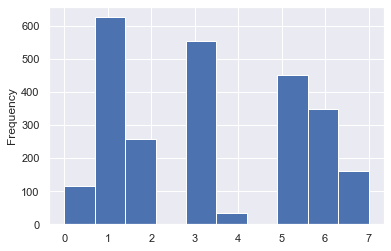

In [37]:
X_df['cluster'].plot(kind='hist')

### <span style="color:#306998">Inertia</span>
<span style="color:#306998">
A way to find the centroids is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is which means that the whole algorithm runs 10 times when we call fit(), and Scikit Learn keep the best solution. The inertia is the mean square distance between each instance and ist closest centroid. The KMeans class run the algorithm n_init times and keeps the model with the lowest inertia.
</span>  

Text(0, 0.5, 'inertia')

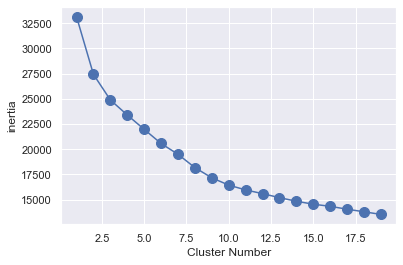

In [38]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=10,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,20)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

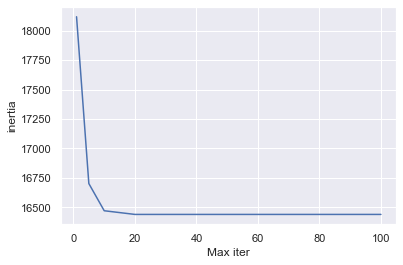

In [39]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=10,
                    random_state=1234,
                    n_init=10,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

### <span style="color:#306998">Silhouette coefficient</span>
<span style="color:#306998">
An instance's silhouette coefficient is equal to (b-a)/max(a,b), where a is the distance to the other instances in the same cluster and b is the mean nearest-cluster distance. 
The silhouette coefficient can vary between -1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the distance may have been assigned to the wrong cluster. 
</span> 

In [40]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0, 0.5, 'silhouette score')

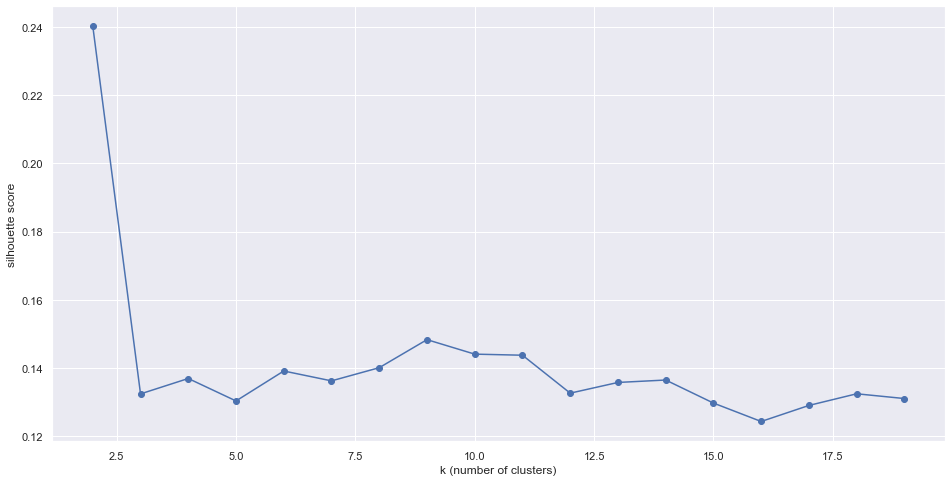

In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [42]:
kmeans = KMeans(n_clusters=10,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([6, 6, 7, ..., 0, 5, 0], dtype=int32)

In [43]:
clusters.shape

(2549,)

In [44]:
features_clustered = pd.DataFrame(X_prep, columns=col_names)

In [45]:
features_clustered['cluster_id'] = clusters

In [46]:
features_clustered.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,1.885112,-0.085216,0.228017,0.618682,0.723609,-0.396990,-0.857529,-0.711981,-0.598723,1.358259,0.116548,-0.446031,0.283751,6
1,2.064743,-0.444090,-0.911062,0.178099,0.723609,-0.144976,-0.874900,-0.711885,0.904950,-1.237535,-0.313121,-0.512332,0.283751,6
2,1.664423,-1.588711,0.228017,0.041005,-1.381961,-0.278317,1.548705,-0.634471,-0.491090,0.087402,-1.033603,-0.437979,0.283751,7
3,-0.003576,1.142513,-1.195831,0.895889,0.723609,-0.186311,-0.917965,-0.711511,-0.507075,0.995157,-0.088877,0.109341,0.283751,6
4,-1.491944,-1.165617,-0.911062,-0.515718,0.723609,-0.426325,1.870076,-0.702853,-0.379193,-1.477800,-1.177380,-0.514872,0.283751,7


In [47]:
features_clustered['cluster_id'].value_counts()

6    525
2    418
0    388
7    329
1    322
5    239
9    150
4    110
3     35
8     33
Name: cluster_id, dtype: int64

In [48]:
kmeans.cluster_centers_

array([[-7.22185813e-01,  6.69743456e-01, -3.02626350e-02,
         5.45220531e-01,  4.13486400e-01, -4.89252040e-02,
        -7.41481962e-01, -5.29831745e-01, -9.17299201e-02,
        -3.85544173e-01,  7.29077432e-01, -4.02749699e-02,
         9.52860577e-02],
       [-9.80009321e-01,  4.98336910e-01,  3.16849398e-02,
         1.98908508e-01,  4.31489365e-03, -1.59079854e-01,
        -4.70826010e-01,  1.46643534e+00, -7.12998589e-02,
        -5.95644686e-01,  1.37571623e-01,  2.86956516e-01,
         1.13869167e-01],
       [ 6.52696210e-01,  2.73225067e-01,  2.94099699e-01,
         3.71774209e-01, -1.38196141e+00, -7.89781026e-02,
        -3.46101751e-01, -4.16844108e-01, -2.52993299e-01,
         6.29129263e-01, -1.93053459e-01, -1.77389605e-01,
         1.86813278e-01],
       [-9.25674796e-01, -9.50930953e-01,  4.90187433e-02,
        -1.41145125e+00, -5.84598826e-02, -1.11525978e-01,
         7.61377170e-01,  7.16523429e-01, -1.35183349e-01,
        -7.88810973e-01, -8.07731976e

In [49]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=col_names)

In [50]:
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.722186,0.669743,-0.030263,0.545221,0.413486,-0.048925,-0.741482,-0.529832,-0.091730,-0.385544,0.729077,-0.040275,0.095286
1,-0.980009,0.498337,0.031685,0.198909,0.004315,-0.159080,-0.470826,1.466435,-0.071300,-0.595645,0.137572,0.286957,0.113869
2,0.652696,0.273225,0.294100,0.371774,-1.381961,-0.078978,-0.346102,-0.416844,-0.252993,0.629129,-0.193053,-0.177390,0.186813
3,-0.925675,-0.950931,0.049019,-1.411451,-0.058460,-0.111526,0.761377,0.716523,-0.135183,-0.788811,-0.807732,-0.247056,-6.083671
4,0.748773,0.066569,-0.046398,0.219577,-0.042053,3.689063,-0.018045,-0.548546,0.055696,0.224331,0.235321,-0.385737,0.210078
5,-0.655776,-1.779966,-0.013859,-2.204952,-0.016424,-0.291338,1.757985,1.490320,-0.335220,-0.933267,-0.513455,0.030159,-0.258776
6,0.832053,0.401610,-0.166113,0.371749,0.723609,-0.202125,-0.433937,-0.418713,-0.235778,0.919902,-0.142251,-0.215553,0.264492
7,0.094687,-1.101233,-0.138116,-0.343226,0.090018,-0.324678,1.262203,-0.508173,-0.281462,-0.525549,-0.148981,-0.193155,-0.208893
8,-0.514691,-0.613280,0.210758,-0.634811,-0.361079,-0.248739,-0.083437,1.508627,-0.023337,-0.660469,-0.192956,6.686517,-0.146006
9,-0.152276,0.592037,0.074241,0.400737,0.190198,-0.051655,-0.305682,-0.507893,3.068811,0.098952,0.063686,-0.016806,0.229724


In [51]:
cluster_centers_df['cluster_id'] = range(0,10)

In [52]:
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,-0.722186,0.669743,-0.030263,0.545221,0.413486,-0.048925,-0.741482,-0.529832,-0.091730,-0.385544,0.729077,-0.040275,0.095286,0
1,-0.980009,0.498337,0.031685,0.198909,0.004315,-0.159080,-0.470826,1.466435,-0.071300,-0.595645,0.137572,0.286957,0.113869,1
2,0.652696,0.273225,0.294100,0.371774,-1.381961,-0.078978,-0.346102,-0.416844,-0.252993,0.629129,-0.193053,-0.177390,0.186813,2
3,-0.925675,-0.950931,0.049019,-1.411451,-0.058460,-0.111526,0.761377,0.716523,-0.135183,-0.788811,-0.807732,-0.247056,-6.083671,3
4,0.748773,0.066569,-0.046398,0.219577,-0.042053,3.689063,-0.018045,-0.548546,0.055696,0.224331,0.235321,-0.385737,0.210078,4
5,-0.655776,-1.779966,-0.013859,-2.204952,-0.016424,-0.291338,1.757985,1.490320,-0.335220,-0.933267,-0.513455,0.030159,-0.258776,5
6,0.832053,0.401610,-0.166113,0.371749,0.723609,-0.202125,-0.433937,-0.418713,-0.235778,0.919902,-0.142251,-0.215553,0.264492,6
7,0.094687,-1.101233,-0.138116,-0.343226,0.090018,-0.324678,1.262203,-0.508173,-0.281462,-0.525549,-0.148981,-0.193155,-0.208893,7
8,-0.514691,-0.613280,0.210758,-0.634811,-0.361079,-0.248739,-0.083437,1.508627,-0.023337,-0.660469,-0.192956,6.686517,-0.146006,8
9,-0.152276,0.592037,0.074241,0.400737,0.190198,-0.051655,-0.305682,-0.507893,3.068811,0.098952,0.063686,-0.016806,0.229724,9


In [53]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['danceability', 'loudness', 'cluster_id']]

features_clustered_sub_df= features_clustered[['danceability', 'loudness', 'cluster_id']]

In [54]:
cluster_center_sub_df

,danceability,loudness,cluster_id
0,-0.722186,0.545221,0
1,-0.980009,0.198909,1
2,0.652696,0.371774,2
3,-0.925675,-1.411451,3
4,0.748773,0.219577,4
5,-0.655776,-2.204952,5
6,0.832053,0.371749,6
7,0.094687,-0.343226,7
8,-0.514691,-0.634811,8
9,-0.152276,0.400737,9


In [55]:
features_clustered_sub_df

,danceability,loudness,cluster_id
0,1.885112,0.618682,6
1,2.064743,0.178099,6
2,1.664423,0.041005,7
3,-0.003576,0.895889,6
4,-1.491944,-0.515718,7
...,...,...,...
2544,-1.199403,-1.038344,5
2545,0.386479,0.634132,6
2546,-1.815279,1.002794,0
2547,-0.054899,-3.411918,5


<AxesSubplot:xlabel='danceability', ylabel='loudness'>

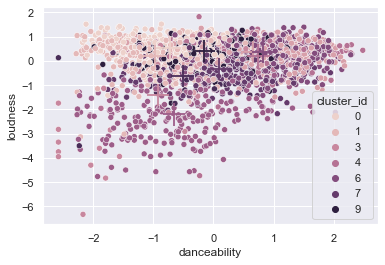

In [56]:
import seaborn as sns

sns.scatterplot(data=features_clustered_sub_df,
               x='danceability',
               y='loudness',
               hue='cluster_id')

# plot centroids
sns.scatterplot(data=cluster_center_sub_df,
               x="danceability",
               y="loudness",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )

<img src="tableau.png"/>

In [57]:
song = np.array([[-0.35992001,  0.42882697, -0.14838292,  0.17284094,  0.16457822,
        -0.03195258, -0.1271788 , -0.20547284,  3.02816589, -0.26732747,
         0.02835173,  0.09672491,  0.07415629]])

In [58]:
kmeans.predict(song)

array([9], dtype=int32)

-------------

### Importing Billboard scraping csv

In [59]:
hot_songs = pd.read_csv('Billboard_scraping.csv')

In [60]:
hot_songs

,Rank,Artists,Song
0,1,The Weeknd & Ariana Grande,Save Your Tears
1,2,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door Open
2,3,Justin Bieber Featuring Daniel Caesar & Giveon,Peaches
3,4,Polo G,Rapstar
4,5,Dua Lipa Featuring DaBaby,Levitating
...,...,...,...
95,96,42 Dugg & Roddy Ricch,4 Da Gang
96,97,Jason Aldean,Blame It On You
97,98,Morgan Wallen,Wasted On You
98,99,AJR,Way Less Sad


In [61]:
## Part 4
# from the input to the cluster suggestion
df_chunk = pd.DataFrame(chunk_list)
df_chunk.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.870,0.587,6,-6.117,1,0.0406,0.020900,0.000003,0.0888,0.8140,122.939,audio_features,1FpAKPGuR8SoIUw5t0I5vn,spotify:track:1FpAKPGuR8SoIUw5t0I5vn,https://api.spotify.com/v1/tracks/1FpAKPGuR8So...,https://api.spotify.com/v1/audio-analysis/1FpA...,191073,4
1,0.905,0.492,2,-8.598,1,0.0595,0.014900,0.000038,0.3710,0.1420,110.017,audio_features,4v7SAP4KD96BFLWiCd1vF0,spotify:track:4v7SAP4KD96BFLWiCd1vF0,https://api.spotify.com/v1/tracks/4v7SAP4KD96B...,https://api.spotify.com/v1/audio-analysis/4v7S...,177840,4
2,0.827,0.189,6,-9.370,0,0.0495,0.852000,0.028000,0.1090,0.4850,88.349,audio_features,0A3JouZ9j02d15KoEzP6F0,spotify:track:0A3JouZ9j02d15KoEzP6F0,https://api.spotify.com/v1/tracks/0A3JouZ9j02d...,https://api.spotify.com/v1/audio-analysis/0A3J...,192680,4
3,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4
4,0.212,0.301,2,-12.505,1,0.0384,0.963000,0.003300,0.1300,0.0798,84.025,audio_features,74WjYdm3Lvbwnds4thYPUU,spotify:track:74WjYdm3Lvbwnds4thYPUU,https://api.spotify.com/v1/tracks/74WjYdm3Lvbw...,https://api.spotify.com/v1/audio-analysis/74Wj...,177333,4


In [62]:
df_chunk['clusters_id'] = clusters
df_chunk

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters_id
0,0.8700,0.5870,6,-6.117,1,0.0406,0.020900,0.000003,0.0888,0.8140,122.939,audio_features,1FpAKPGuR8SoIUw5t0I5vn,spotify:track:1FpAKPGuR8SoIUw5t0I5vn,https://api.spotify.com/v1/tracks/1FpAKPGuR8So...,https://api.spotify.com/v1/audio-analysis/1FpA...,191073,4,6
1,0.9050,0.4920,2,-8.598,1,0.0595,0.014900,0.000038,0.3710,0.1420,110.017,audio_features,4v7SAP4KD96BFLWiCd1vF0,spotify:track:4v7SAP4KD96BFLWiCd1vF0,https://api.spotify.com/v1/tracks/4v7SAP4KD96B...,https://api.spotify.com/v1/audio-analysis/4v7S...,177840,4,6
2,0.8270,0.1890,6,-9.370,0,0.0495,0.852000,0.028000,0.1090,0.4850,88.349,audio_features,0A3JouZ9j02d15KoEzP6F0,spotify:track:0A3JouZ9j02d15KoEzP6F0,https://api.spotify.com/v1/tracks/0A3JouZ9j02d...,https://api.spotify.com/v1/audio-analysis/0A3J...,192680,4,7
3,0.5020,0.9120,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4,6
4,0.2120,0.3010,2,-12.505,1,0.0384,0.963000,0.003300,0.1300,0.0798,84.025,audio_features,74WjYdm3Lvbwnds4thYPUU,spotify:track:74WjYdm3Lvbwnds4thYPUU,https://api.spotify.com/v1/tracks/74WjYdm3Lvbw...,https://api.spotify.com/v1/audio-analysis/74Wj...,177333,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.2690,0.2380,9,-15.448,0,0.0315,0.972000,0.749000,0.0999,0.0343,89.631,audio_features,0I5pXnykUOC6UmGr8N6x7q,spotify:track:0I5pXnykUOC6UmGr8N6x7q,https://api.spotify.com/v1/tracks/0I5pXnykUOC6...,https://api.spotify.com/v1/audio-analysis/0I5p...,111800,4,5
2545,0.5780,0.7930,10,-6.030,1,0.0484,0.002050,0.002080,0.0629,0.4530,123.023,audio_features,0FgI8VrOH7N35LtiOBZVwA,spotify:track:0FgI8VrOH7N35LtiOBZVwA,https://api.spotify.com/v1/tracks/0FgI8VrOH7N3...,https://api.spotify.com/v1/audio-analysis/0FgI...,208560,4,6
2546,0.1490,0.8590,8,-3.954,1,0.0480,0.109000,0.001080,0.3290,0.4970,66.706,audio_features,2MPlWkhbTJKXp2w1OtPS6l,spotify:track:2MPlWkhbTJKXp2w1OtPS6l,https://api.spotify.com/v1/tracks/2MPlWkhbTJKX...,https://api.spotify.com/v1/audio-analysis/2MPl...,137680,4,0
2547,0.4920,0.0499,11,-28.814,1,0.0484,0.753000,0.834000,0.1390,0.6310,101.366,audio_features,7f5pVscGqWGPmzyAJ3thAI,spotify:track:7f5pVscGqWGPmzyAJ3thAI,https://api.spotify.com/v1/tracks/7f5pVscGqWGP...,https://api.spotify.com/v1/audio-analysis/7f5p...,90783,3,5


### <span style="color:#44bcd8">“Lo atamos con alambre”</span>
<span style="color:#44bcd8">
This is probably one of the most popular lunfardo expressions used nowadays in Argentina. It is used to describe those difficult situations that are solved in a careless way, just to get rid of the problem without investing the appropriate time, money and resources to give a right and definite solution to the problem. It is understood that the provided solution will only last for a limited period of time.
</span>  

In [63]:
import random

# from song name to audio feature
def cluster_song(song):
    song = sp.search(q= song , limit = 1)
    song_id = song['tracks']['items'][0]['id']
    song_features = sp.audio_features(song_id)
    df = pd.DataFrame(song_features, index= [0])
    df_1 = df._get_numeric_data()
    df_song_scaled = scaler.transform(df_1)
    cluster_num = kmeans.predict(df_song_scaled)
    sub_df = df_chunk.loc[df_chunk['clusters_id'] == int(cluster_num)]
    sub_df.reset_index(drop=True, inplace=True) 
    song_name_id = random.choice(sub_df["id"])
    name = sp.track(song_name_id)['name']  
    return f"I recommend you: {name}"

In [66]:
# return random reccomandation

song = str(input('name a Song: ')).title()


if song in list(hot_songs['Song']):
     print('I recommend you to listen to: ' + random.choice(hot_songs['Song']))
else:
     print(cluster_song(song))

name a Song: rapstar
I recommend you to listen to: Wasted On You


In [65]:
df_chunk.to_csv('df_chunk.csv', index=False)